# Final Project Submission

* Student name: Sabina Bains
* Student pace: Self Paced
* Scheduled project review date / time: Friday, 9/24/21
* Instructor name: Claude Fried
* Blog post URL: ??

# Microsoft Movie Studio Analysis

## Objective:

This analysis explores data 

## Business Problem

Explore movie data and provide insights for Microsoft to successfuly launch their movie studio??????????

### Importing Packages and Reading in Files

In [2]:
# Import Standard Packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain
import statistics
import os

%matplotlib inline

pd.set_option('display.max_columns', None)
plt.style.use('seaborn-talk')

In [3]:
#Viewing and changing filenames for easier file importing
filenames = os.listdir('zippedData')
paths = []

for file in filenames:
    paths.append('zippeddata/'+file)
    
for num, name in enumerate(paths):
    print(num, name)

0 zippeddata/imdb.title.crew.csv.gz
1 zippeddata/imdb.title.basics.tsv.gz
2 zippeddata/tmdb.movies.csv.gz
3 zippeddata/imdb.title.akas.csv.gz
4 zippeddata/imdb.title.ratings.csv.gz
5 zippeddata/imdb.name.basics.csv.gz
6 zippeddata/rt.reviews.tsv.gz
7 zippeddata/imdb.title.basics.csv.gz
8 zippeddata/rt.movie_info.tsv.gz
9 zippeddata/tn.movie_budgets.csv.gz
10 zippeddata/bom.movie_gross.csv.gz
11 zippeddata/imdb.title.principals.csv.gz


#  1: TOP GENRES BY MEDIAN PROFIT

In [4]:
#importing profit dataset
profit = pd.read_csv(paths[9])

In [5]:
# Importing Genre Data and Filtering on Type = Movie
genres = pd.read_csv(paths[1],sep="\t",low_memory=False)
genres = genres.loc[genres['titleType']=='movie']

In [6]:
# creating a new column "startYear" based on the year part of the release date for merging with the sales data.
profit['startYear'] = profit['release_date'].map(lambda x : x[-4:])
profit.rename(columns={'movie':'primaryTitle'}, inplace=True)

In [7]:
# merging on movie title and year release 
f = pd.merge(genres,profit,on=['primaryTitle','startYear'],how='inner')

In [8]:
# Removing "," and "$" from dollar columns to turn into type int
f_dollar_cols = ['production_budget', 'domestic_gross','worldwide_gross']
for i in f_dollar_cols:
    f[i]=f[i].str.replace('$','')
    f[i]=f[i].str.replace(',','').astype(int)
f['profit']=f['worldwide_gross']-f['production_budget']

In [59]:
ani = [f['production_budget'] for val in f if 'Animation' in f['']

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,profit
0,tt0004972,movie,The Birth of a Nation,The Birth of a Nation,0,1915,\N,195,"Drama,History,War",78,"Feb 8, 1915",110000,10000000,11000000,10890000
1,tt0006864,movie,Intolerance,Intolerance: Love's Struggle Throughout the Ages,0,1916,\N,163,"Drama,History",24,"Sep 5, 1916",385907,0,0,-385907
2,tt0011549,movie,Over the Hill to the Poorhouse,Over the Hill to the Poorhouse,0,1920,\N,110,"Crime,Drama",84,"Sep 17, 1920",100000,3000000,3000000,2900000
3,tt0015624,movie,The Big Parade,The Big Parade,0,1925,\N,151,"Drama,Romance,War",7,"Nov 19, 1925",245000,11000000,22000000,21755000
4,tt0016641,movie,Ben-Hur: A Tale of the Christ,Ben-Hur: A Tale of the Christ,0,1925,\N,143,"Adventure,Drama,Romance",70,"Dec 30, 1925",3900000,9000000,9000000,5100000


In [10]:
#Creating Deduplicated list of Genres to use as Keys for Dictionary
genre_list = f.genres.str.split(',').to_list()
genre_list = list(set(list(chain.from_iterable(genre_list))))

In [11]:
#creating dictionary with values as lists to map ratings to genres
genre_dict={}
val_dict={}
for item in genre_list:
    genre_dict[item] = []
for item in genre_list:
    val_dict[item] = []

In [15]:
#appending values from df to dictionary based on genre key
for index, row in f.iterrows():
    for genre in val_dict:
        if genre in row['genres']:
            val_dict[genre].append(row['profit'])

In [12]:
budget_dict= genre_dict.copy()
for index, row in f.iterrows():
    for genre in budget_dict:
        if genre in row['genres']:
            budget_dict[genre].append(row['production_budget'])

In [13]:
budget_dict

{'Fantasy': [1488000,
  2777000,
  2280000,
  134000,
  2627000,
  2900000,
  3380000,
  6000000,
  9000000,
  3000000,
  400000,
  100000,
  15000000,
  24000000,
  5100000,
  12000000,
  20000000,
  18000000,
  9300000,
  8000000,
  5000000,
  12500000,
  8000000,
  10100000,
  18000000,
  30000000,
  11000000,
  8000000,
  17900000,
  27000000,
  18000000,
  15000000,
  16000000,
  18000000,
  4000000,
  3500000,
  15000000,
  3000000,
  15000000,
  18000000,
  9000000,
  4700000,
  3000000,
  32000000,
  11500000,
  30000000,
  20000000,
  22000000,
  50000000,
  30000000,
  6000000,
  20000000,
  20000000,
  24000000,
  80000000,
  7000000,
  55000000,
  14600000,
  28000000,
  3000000,
  19000000,
  3000000,
  45000000,
  40000000,
  55000000,
  45000000,
  20000000,
  12000000,
  14000000,
  32000000,
  15000000,
  45000000,
  32000000,
  14000000,
  27000000,
  45000000,
  85000000,
  30000000,
  28000000,
  6000000,
  35000000,
  13000000,
  80000000,
  55000000,
  87500000,
 

In [16]:
# calculating count of movies in each genre (so we can exclude genres with low movie sample)
count_dict = genre_dict.copy()
for i in count_dict:
    count_dict[i] = len(count_dict[i])

In [17]:
# calculating average rating per Genre
median_val_dict = {}
for i in val_dict:
    median_val_dict[i] = statistics.median(val_dict[i])

In [18]:
# calculating average rating per Genre
budget_val_dict = {}
for i in budget_dict:
    budget_val_dict[i] = statistics.median(budget_dict[i])

In [21]:
median_val_dict

{'Fantasy': 27450353.0,
 'Music': 8103064.0,
 'Film-Noir': 5650000.0,
 'History': 5681583.0,
 'Musical': 3976000.0,
 'Romance': 10376506.0,
 'Comedy': 16438538.0,
 'Family': 29400000.0,
 '\\N': -2609697.0,
 'Drama': 8231690.0,
 'Thriller': 21732532.5,
 'Action': 35538560.0,
 'Reality-TV': -1000000.0,
 'Adventure': 67642725.0,
 'Adult': 44975000.0,
 'News': 52365925.0,
 'Horror': 15943401.0,
 'Animation': 136827677.0,
 'Documentary': 1459120.5,
 'Western': 1807976.0,
 'War': 6524028.0,
 'Biography': 11827794.0,
 'Crime': 10200000.0,
 'Sci-Fi': 33560769.5,
 'Mystery': 20909437.0,
 'Sport': 9867665.0}

In [22]:
#creating df from ratings column from dictionary
profit_by_genre = pd.DataFrame(median_val_dict,index=['Median Profit'])
profit_by_genre = profit_by_genre.transpose()
profit_by_genre = profit_by_genre.reset_index()
profit_by_genre.head()

,index,Median Profit
0,Fantasy,27450353.0
1,Music,8103064.0
2,Film-Noir,5650000.0
3,History,5681583.0
4,Musical,3976000.0


In [23]:
budget_by_genre = pd.DataFrame(budget_val_dict,index=['production_budget'])
budget_by_genre = budget_by_genre.transpose()
budget_by_genre = budget_by_genre.reset_index()
budget_by_genre.head()

,index,production_budget
0,Fantasy,32000000.0
1,Music,13250000.0
2,Film-Noir,1250000.0
3,History,25000000.0
4,Musical,10500000.0


In [24]:
#creating df with count column from dictionary
count_by_genre = pd.DataFrame(count_dict,index=['Count'])
count_by_genre = count_by_genre.transpose()
count_by_genre = count_by_genre.reset_index()
count_by_genre.head()

,index,Count
0,Fantasy,347
1,Music,198
2,Film-Noir,6
3,History,150
4,Musical,60


In [50]:
# final merge onto genre column for analysis
genre = pd.merge(profit_by_genre, budget_by_genre, on="index")
genre = pd.merge(genre, count_by_genre, on="index")
genre.rename(columns={'index':'Genre'},inplace=True)
genre.head()

,Genre,Median Profit,production_budget,Count
0,Fantasy,27450353.0,32000000.0,347
1,Music,8103064.0,13250000.0,198
2,Film-Noir,5650000.0,1250000.0,6
3,History,5681583.0,25000000.0,150
4,Musical,3976000.0,10500000.0,60


In [51]:
# filtering out any genre column that has less than 10 movies represented and sorting by highest rating
genre = genre.loc[genre['Count'] >= 10].reset_index(drop=True)
genre = genre.sort_values('production_budget', ascending = False)

In [52]:
genre = genre[['Genre','Median Profit','production_budget']]

In [53]:
genre

,Genre,Median Profit,production_budget
12,Animation,136827677.0,75000000.0
10,Adventure,67642725.0,60000000.0
9,Action,35538560.0,45000000.0
18,Sci-Fi,33560769.5,45000000.0
0,Fantasy,27450353.0,32000000.0
6,Family,29400000.0,25530000.0
17,Crime,10200000.0,25000000.0
2,History,5681583.0,25000000.0
20,Sport,9867665.0,24000000.0
8,Thriller,21732532.5,22000000.0


In [54]:
genre = genre.melt(id_vars='Genre').rename(columns=str.title)

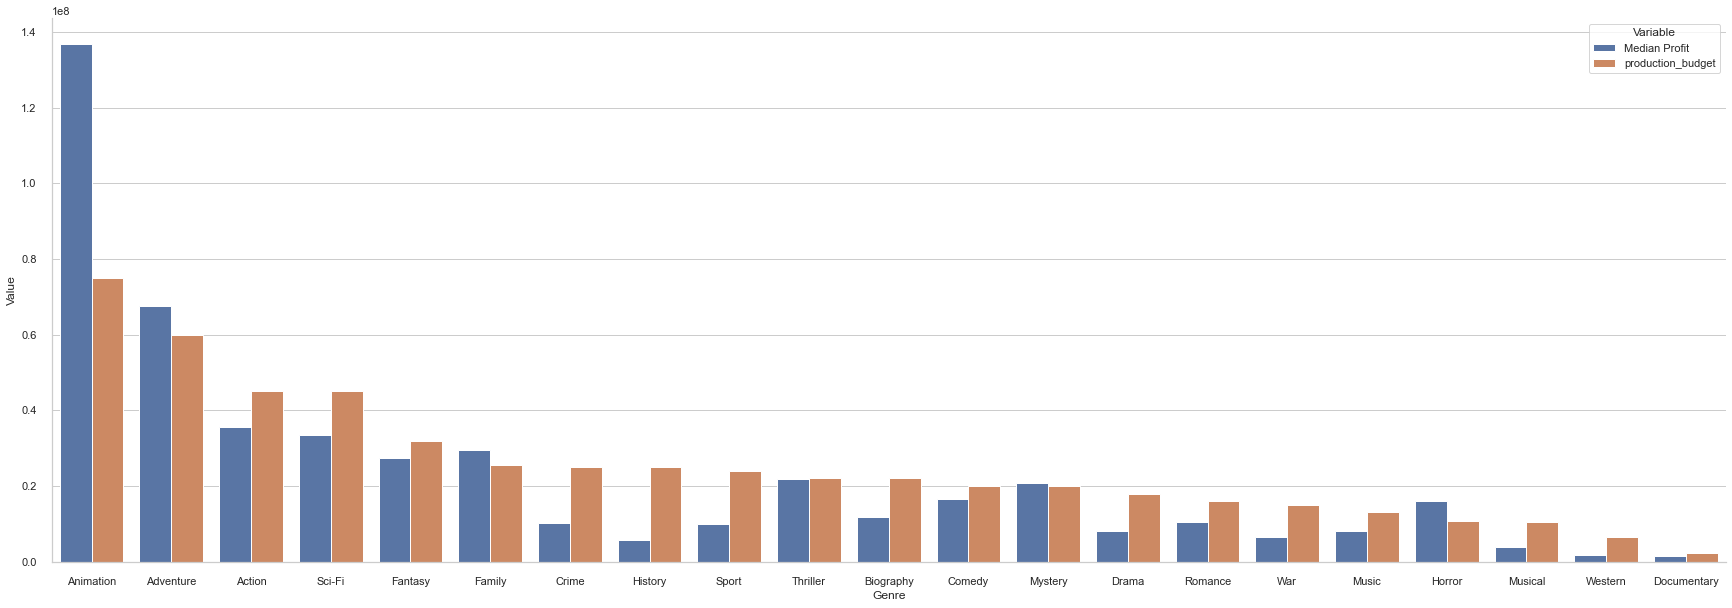

In [58]:
# df = pd.DataFrame({
#     'Factor': ['Growth', 'Value'],
#     'Weight': [0.10, 0.20],
#     'Variance': [0.15, 0.35]
# })

# df
fig, ax1 = plt.subplots(figsize=(30, 10))

sns.barplot(x='Genre', y='Value', hue='Variable', data=genre, ax=ax1)
sns.despine(fig)

In [24]:
# matplotlib.rc_file_defaults()
# ax1 = sns.set_style(style=None, rc=None )

# fig, ax1 = plt.subplots(figsize=(12,6))

# sns.lineplot(data = genre['production_budget'], marker='o', sort = False, ax=ax1)
# ax2 = ax1.twinx()

# sns.barplot(data = genre, x='Genre', y='Median Profit', alpha=0.5, ax=ax2)

In [25]:
def top_in_genre(genre):
    cols=['primaryTitle', 'release_date',
       'runtimeMinutes','genres',
       'production_budget','worldwide_gross', 'profit']
    df = f[cols]
    df = df.loc[df['genres'].str.contains(genre)]
    df = df.sort_values(by='profit',ascending=False).head(5)
    return df

In [26]:
top_in_genre('Fantasy')

,primaryTitle,release_date,runtimeMinutes,genres,production_budget,worldwide_gross,profit
2491,Avatar,"Dec 18, 2009",162,"Action,Adventure,Fantasy",425000000,2776345279,2351345279
2942,Beauty and the Beast,"Mar 17, 2017",129,"Family,Fantasy,Musical",160000000,1259199706,1099199706
3224,Aquaman,"Dec 21, 2018",143,"Action,Adventure,Fantasy",160000000,1146894640,986894640
2757,Alice in Wonderland,"Mar 5, 2010",99,"Fantasy,Musical",200000000,1025491110,825491110
2756,Alice in Wonderland,"Mar 5, 2010",108,"Adventure,Family,Fantasy",200000000,1025491110,825491110


# SUGGESTION 2 

#don't need the region when merging with profit since they are all US, can skip the beginning merge

In [27]:
#read in data, merge together
namebasics = pd.read_csv(paths[5])
titleps = pd.read_csv(paths[11])
crew = pd.merge(titleps,namebasics,on='nconst',how='left')
#merge with financial data
fcrew = pd.merge(crew,f,on='tconst',how='inner')

In [28]:
#keep certain cols
crew_cols = ['category','tconst','primary_name','characters','primaryTitle','release_date',
            'production_budget','worldwide_gross','profit']
fcrew = fcrew[crew_cols]

In [29]:
fcrew['category'].unique()

array(['cinematographer', 'actor', 'director', 'producer', 'composer',
       'actress', 'writer', 'editor', 'production_designer', 'self',
       'archive_footage', 'archive_sound'], dtype=object)

In [30]:
def top_crew(df,category_list):
    df = df.loc[df['category'].isin(category_list)]
    df = df.groupby('primary_name')['profit'].agg(['mean','count']).reset_index()
    df.sort_values('mean',ascending=False,inplace=True)
    
    # Bar plot of 
    fig, ax = plt.subplots(figsize=(25,10))
    sns.barplot(x = 'primary_name',
                y = 'mean',
                data = df.head(10),
                ax = ax,
                color = 'tab:blue')
    fig.tight_layout()
    return fig, df.head(5)

(<Figure size 1800x720 with 1 Axes>,
                primary_name          mean  count
 259  Kristen Anderson-Lopez  1.122470e+09      1
 437        Walter Slaughter  8.254911e+08      1
 335                     Ono  8.254911e+08      1
 315             Nate Archer  8.254911e+08      1
 359            Randy Newman  7.062339e+08      2)

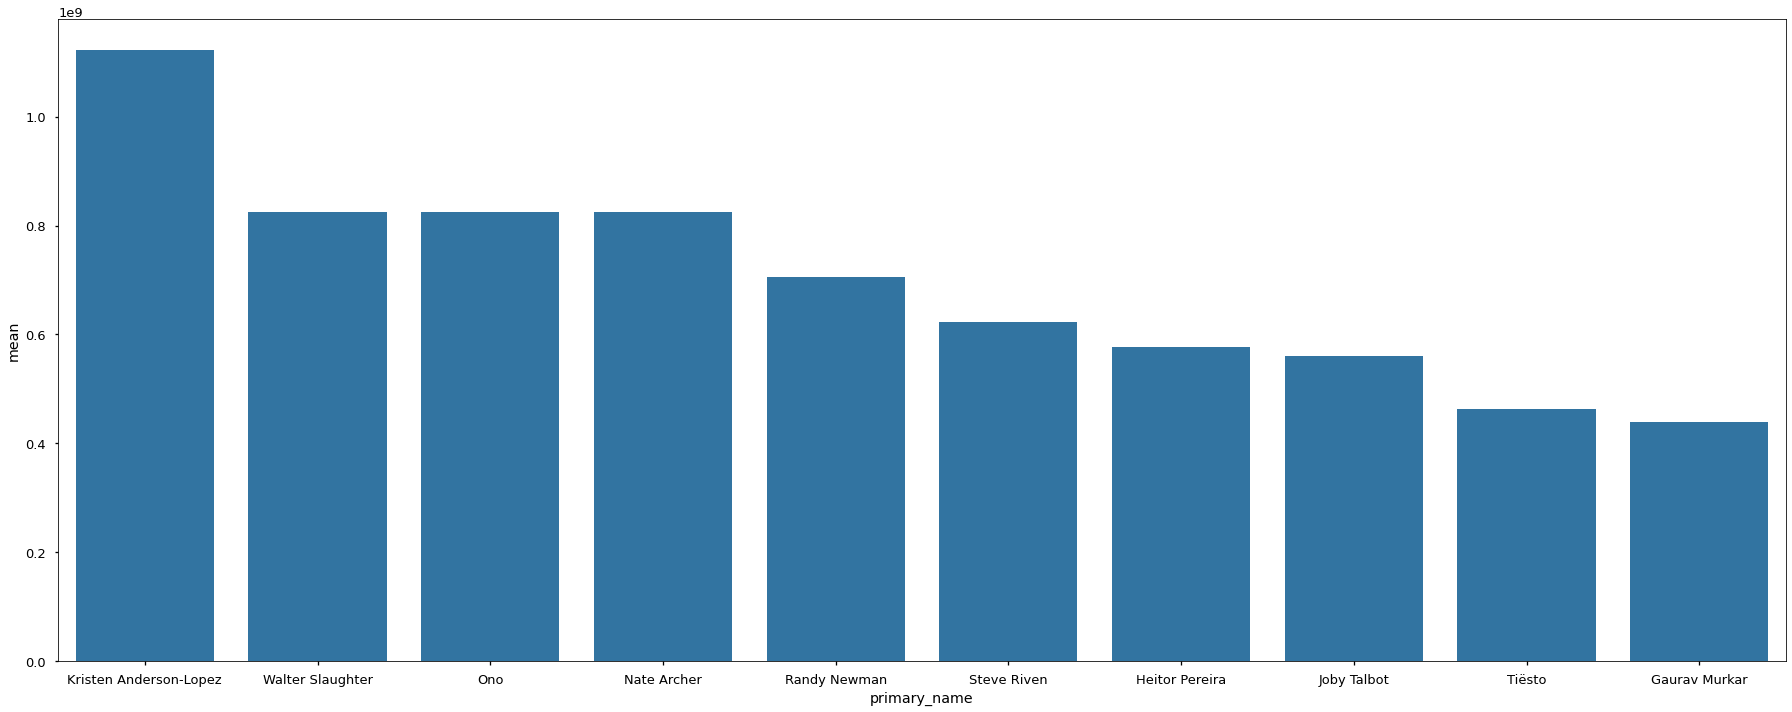

In [31]:
top_crew(fcrew,['composer'])

In [32]:
fcrew.loc[fcrew['primary_name']=='Guy Hendrix Dyas']

,category,tconst,primary_name,characters,primaryTitle,release_date,production_budget,worldwide_gross,profit
7686,production_designer,tt1375666,Guy Hendrix Dyas,NaN,Inception,"Jul 16, 2010",160000000,835524642,675524642


# time of year

In [33]:
f['release_month'] = f['release_date'].map(lambda x : x[:4])

In [34]:
f['release_day'] = f['release_date'].map(lambda x : x[4:6])

In [35]:
f['release_day'] = f['release_day'].str.strip(',')
f['release_day'] = f['release_day'].astype(int)

In [36]:
month= f.groupby(by='release_month').mean().reset_index()
month['release_month'] = month['release_month'].str.strip()

In [37]:
month_list=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [38]:
month = month.set_index('release_month')
month = month.loc[month_list]

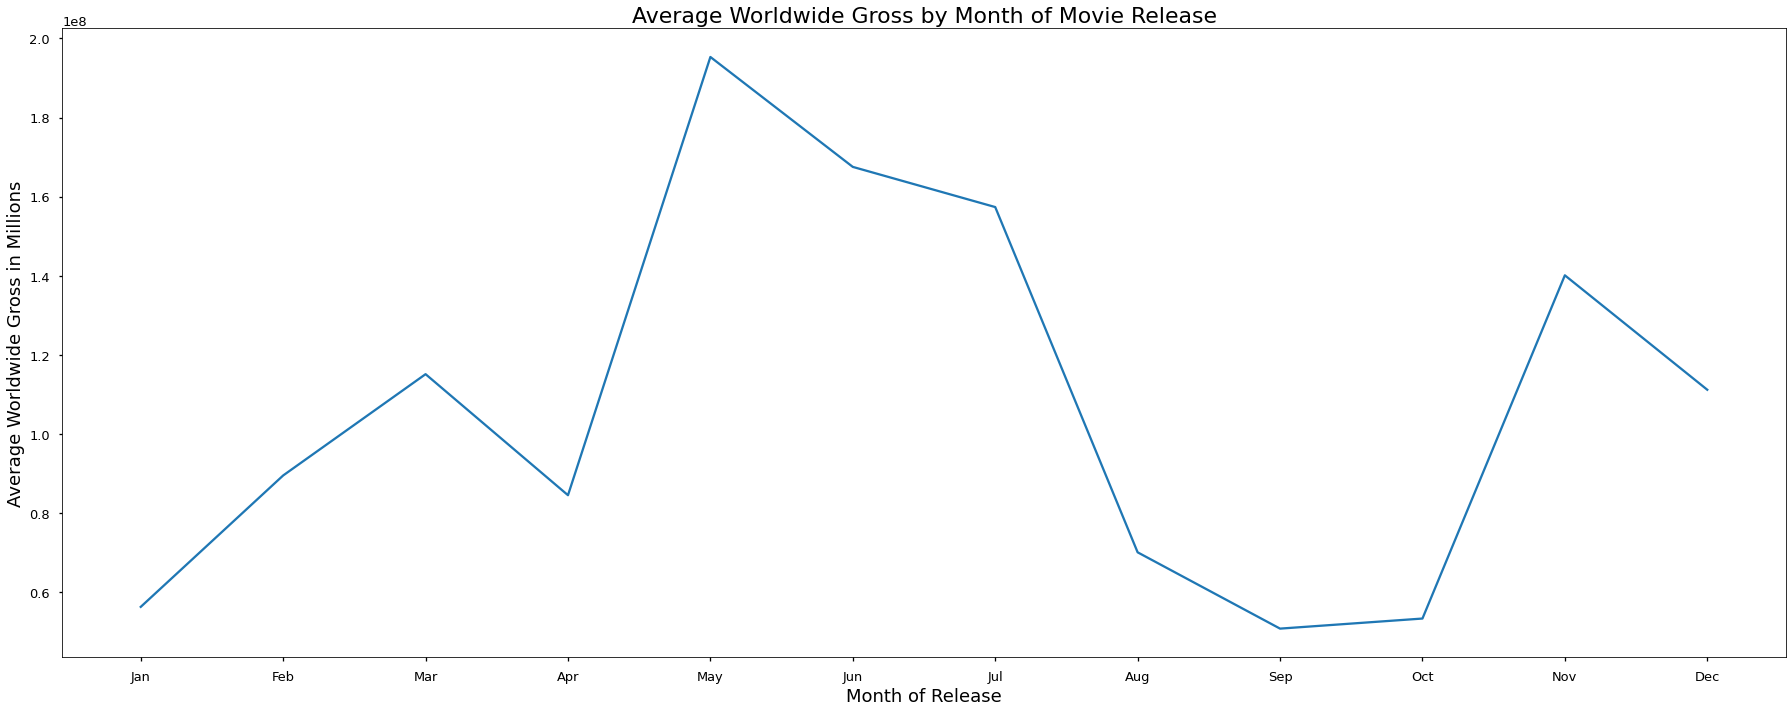

In [39]:
# Bar Plot of Ratings by Genre
fig, ax = plt.subplots(figsize=(25,10))
sns.lineplot(x = 'release_month',
            y = 'worldwide_gross',
            data = month,
            ax = ax,
            color = 'tab:blue')
fig.tight_layout()

# set labels
plt.xlabel("Month of Release", size=18)
plt.ylabel("Average Worldwide Gross in Millions", size=18)
plt.title("Average Worldwide Gross by Month of Movie Release", size=22)
plt.tight_layout()

## Conclusion

- Microsoft should create Animated, Adventure, or Action movies, as these genre's have the highest median profit
- 
- Microsoft should aim to release movies in early summer, as May, June, and July have the highest average movie gross. 

## Next Steps

In [ ]:
- 